<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 5.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-05-02 14:10:05
-------------------
qualified stocks: 95
with latest results: 89
still star stocks: 47
-------------------
Initial Investment:  1.14 C
CY Investment:  1.41 C
Reserve:  4.78 L
Current:  1.22 C
-------------------
Today PnL: -3.77 K (-0.03%)
Current PnL: -21.18 L (-15.02%)
CY Booked + Current PnL: -19.17 L (-13.59%)
-------------------
Total profit:  3.55 L
Total loss:  -24.73 L
-------------------
Total Booked + Current PnL: 7.81 L (6.85%)
Total Booked PnL: 28.99 L (25.42%)
Curr Year Booked PnL: 2.01 L (1.66%)
Prev Year Booked PnL: 26.98 L (23.66%)
Est FTT:  2.02 C
Est FTT PnL: 80.44 L (66.14%)
-------------------
Est LTT:  2.62 C
Est LTT PnL: 1.40 C (115.49%)
Deployed:  1.14 C
Current:  1.22 C
CAGR/XIRR %: 4.71%


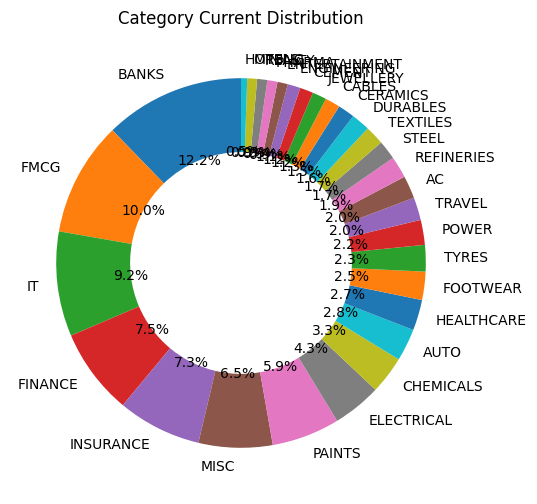

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
33,HDFCBANK,1561.04,2170.00,3.67,X-LC,82.11,102391.0,19656.0,12615.0,0.36,...,12.32,39.01,4.0,1.56,0.88,35.29,X40,BTT,LC,BANKS
71,SBILIFE,1496.49,1924.99,-0.34,H-LC,89.47,147991.0,22286.0,13704.0,-0.23,...,9.26,28.63,NaN,1.63,1.27,31.84,AR,ATH,LC,INSURANCE
58,PIDILITIND,2504.06,3576.00,-13.58,X-LC,67.37,90135.0,15013.0,17144.0,-0.97,...,19.02,42.81,10.0,0.88,0.77,13.04,X40,BTT,LC,CHEMICALS
72,SBIN,760.30,863.00,-15.73,M-LC,57.89,211390.0,9910.0,17313.0,1.15,...,8.19,13.51,93.0,0.57,1.81,15.81,XY25,NTT,LC,BANKS
64,RELIANCE,1288.53,1526.00,3.29,X-LC,90.53,221990.0,18402.0,19113.0,0.38,...,8.61,18.43,67.0,0.96,1.90,20.92,XY25,NTT,LC,REFINERIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,RBLBANK,230.61,388.00,32.03,M-SC,96.84,205090.0,-29210.0,189113.0,0.74,...,92.21,68.25,-48.0,-0.15,1.76,35.06,XY24,NTT,SC,BANKS
65,REPCOHOME,515.07,880.00,-57.53,H-SC,94.74,157409.0,-47589.0,192826.0,-1.96,...,122.50,70.85,-44.0,-0.25,1.35,27.07,XY24,NTT,SC,FINANCE
67,SAIL,130.64,228.00,72.16,M-MC,15.79,195878.0,-29084.0,196740.0,0.04,...,100.44,74.53,-18.0,-0.15,1.68,13.73,XY24,BTT,MC,STEEL
11,BANDHANBNK,214.25,400.00,-37.04,H-SC,77.89,188303.0,-60227.0,275694.0,-1.99,...,146.41,86.70,-29.0,-0.22,1.61,24.57,XY24,NTT,SC,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
0,5PAISA,564.75,810.00,123.56,H-SC,40.00,120865.0,-66067.0,147250.0,-1.70,...,121.83,43.43,20.0,-0.45,1.03,15.63,X40N,BTT,SC,FINANCE
2,ABB,5319.37,8953.12,-39.77,H-LC,60.00,136800.0,3816.0,87032.0,-0.31,...,63.62,68.31,NaN,0.04,1.17,11.55,AR,ATH,LC,ELECTRICAL
4,ADANIPORTS,1103.69,1583.00,-1.49,M-LC,71.58,174113.0,22907.0,42762.0,4.47,...,24.56,43.43,NaN,0.54,1.49,20.69,XY24,NTT,LC,MISC
5,ALKYLAMINE,2347.98,4567.52,-17.30,X-SC,36.84,73840.0,-27123.0,122567.0,0.86,...,165.99,94.53,-59.0,-0.22,0.63,9.47,SR,ATH,SC,CHEMICALS
6,ANGELONE,2328.67,3033.00,-7.45,H-SC,34.74,150794.0,-570.0,46354.0,0.33,...,30.74,30.25,77.0,-0.01,1.29,19.35,X40N,NTT,SC,FINANCE
7,ASIANPAINT,2961.56,4250.00,-28.23,X-LC,66.32,164635.0,-36751.0,124365.0,-0.19,...,75.54,43.51,-18.0,-0.30,1.41,13.55,X40,BTT,LC,PAINTS
12,BANKINDIA,112.90,190.00,-24.76,M-MC,64.21,103310.0,3055.0,65406.0,1.03,...,63.31,68.29,-12.0,0.05,0.88,28.77,XR,NTT,MC,BANKS
13,BATAINDIA,1550.24,2096.00,-33.81,M-SC,17.89,99509.0,-29161.0,74463.0,-0.79,...,74.83,35.20,-8.0,-0.39,0.85,1.52,X40,NTT,SC,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-18.10,H-MC,85.26,175872.0,-1185.0,39694.0,1.95,...,22.57,21.75,-14.0,-0.03,1.51,25.80,XY24,NTT,MC,PAINTS
15,BRITANNIA,4905.19,6446.05,8.01,X-LC,70.53,212980.0,16772.0,44854.0,-2.10,...,21.06,31.41,239.0,0.37,1.82,16.38,AR,ATH,LC,FMCG


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
3,ACC,2579.05,3906.0,-36.77,M-MC,13.68,136371.0,-51900.0,148767.0,-1.05,...,109.09,51.45,-37.0,-0.35,1.17,2.72,XY24,BTT,MC,CEMENT
4,ADANIPORTS,1103.69,1583.0,-1.49,M-LC,71.58,174113.0,22907.0,42762.0,4.47,...,24.56,43.43,NaN,0.54,1.49,20.69,XY24,NTT,LC,MISC
9,ATULAUTO,624.44,844.0,3408.11,M-SC,12.63,109339.0,-38029.0,89844.0,-0.26,...,82.17,35.16,-49.0,-0.42,0.94,11.68,XY24,NTT,SC,AUTO
10,AWL,361.39,485.0,-68.66,H-MC,43.16,137994.0,-48122.0,111775.0,0.34,...,81.00,34.20,-36.0,-0.43,1.18,13.66,XY24,NTT,MC,FMCG
11,BANDHANBNK,214.25,400.0,-37.04,H-SC,77.89,188303.0,-60227.0,275694.0,-1.99,...,146.41,86.70,-29.0,-0.22,1.61,24.57,XY24,NTT,SC,BANKS
14,BERGEPAINT,558.54,680.0,-18.10,H-MC,85.26,175872.0,-1185.0,39694.0,1.95,...,22.57,21.75,-14.0,-0.03,1.51,25.80,XY24,NTT,MC,PAINTS
17,CAMPUS,294.86,393.0,NaN,NaN,53.68,136958.0,-30817.0,86653.0,-0.82,...,63.27,33.28,-16.0,-0.36,1.17,6.04,XY24,NTT,NaN,FOOTWEAR
22,DABUR,505.20,735.0,-14.92,X-MC,21.05,187317.0,-9711.0,99334.0,-1.53,...,53.03,45.49,1.0,-0.10,1.60,6.40,XY24,BTT,MC,FMCG
26,EASEMYTRIP,18.12,26.4,19.86,M-SC,22.11,115535.0,-61280.0,142073.0,-1.58,...,122.97,45.70,-91.0,-0.43,0.99,7.25,XY24,NTT,SC,TRAVEL
28,GICRE,340.22,583.0,5.49,H-MC,47.37,99848.0,20237.0,36574.0,2.29,...,36.63,71.36,109.0,0.55,0.85,36.37,XY24,BTT,MC,INSURANCE


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
1,AARTIIND,487.04,919.00,13.07,M-SC,73.68,71443.0,-9893.0,82031.0,1.56,...,114.82,88.69,-8.0,-0.12,0.61,20.47,XR,NTT,SC,CHEMICALS
2,ABB,5319.37,8953.12,-39.77,H-LC,60.00,136800.0,3816.0,87032.0,-0.31,...,63.62,68.31,NaN,0.04,1.17,11.55,AR,ATH,LC,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-17.30,X-SC,36.84,73840.0,-27123.0,122567.0,0.86,...,165.99,94.53,-59.0,-0.22,0.63,9.47,SR,ATH,SC,CHEMICALS
8,ASIANTILES,75.41,137.00,4972.22,M-SC,37.89,55644.0,-38166.0,114782.0,-0.75,...,206.28,81.67,-16.0,-0.33,0.48,7.76,XR,NTT,SC,CERAMICS
12,BANKINDIA,112.90,190.00,-24.76,M-MC,64.21,103310.0,3055.0,65406.0,1.03,...,63.31,68.29,-12.0,0.05,0.88,28.77,XR,NTT,MC,BANKS
15,BRITANNIA,4905.19,6446.05,8.01,X-LC,70.53,212980.0,16772.0,44854.0,-2.10,...,21.06,31.41,239.0,0.37,1.82,16.38,AR,ATH,LC,FMCG
16,BSOFT,628.85,844.81,-25.64,M-SC,48.42,69816.0,-40233.0,78026.0,2.24,...,111.76,34.34,-28.0,-0.52,0.60,14.94,XR,ATH,SC,IT
18,CAMS,3643.00,5250.99,-2.33,H-SC,56.84,108142.0,6138.0,38888.0,-1.13,...,35.96,44.14,261.0,0.16,0.93,26.64,XR,ATH,SC,MISC
20,COFFEEDAY,59.14,80.00,-57.75,L-SC,92.63,62669.0,-50880.0,90933.0,1.87,...,145.10,35.27,NaN,-0.56,0.54,53.38,XR,NTT,SC,HOTELS
23,DEN,52.79,75.00,83.94,L-SC,33.68,51328.0,-33136.0,68672.0,-1.20,...,133.79,42.07,-21.0,-0.48,0.44,9.00,AR,NTT,SC,ENTERTAINMENT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,18.68
1,20,34.27
2,30,47.26


In [9]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,37.24
X40,14.29
AR,13.25
X40N,12.82
XR,10.47
XY25,9.59
SR,1.18
X200,1.18


In [10]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,19.39
X-LC,17.85
M-SC,16.47
X-MC,8.18
M-LC,8.16
M-MC,7.60
H-MC,7.29
H-LC,6.50
X-SC,2.60


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.90
X40       X-LC          8.00
XY24      M-SC          6.93
XY25      X-LC          5.39
XY24      M-MC          5.11
          M-LC          5.06
X40N      H-SC          4.94
          M-SC          3.81
XY24      H-MC          3.54
AR        H-LC          3.33
          X-LC          3.28
XR        H-SC          3.18
XY24      X-MC          3.17
XR        M-SC          2.87
AR        X-MC          2.32
XY25      M-LC          1.81
X40       M-SC          1.80
          H-LC          1.64
X40N      X-MC          1.60
XY25      H-LC          1.53
AR        H-SC          1.48
X40N      H-MC          1.32
XR        M-LC          1.29
X200      X-LC          1.18
X40N      X-SC          1.15
AR        H-MC          1.14
X40       X-MC          1.09
XR        L-SC          1.01
XY24      L-SC          0.92
X40       H-SC          0.89
XR        M-MC          0.88
X40       H-MC          0.87
XY25      M-MC          0.86
XR        X-SC          0.82
AR        M-MC          0.75
SR        X-SC          0.63
          M-SC          0.55
AR        M-SC          0.51
          L-SC          0.44
XR        H-MC          0.42
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,12.25,-9.06,61.66
FMCG,10.01,-3.56,35.63
IT,9.16,-27.38,94.06
FINANCE,7.53,-25.64,82.33
INSURANCE,7.33,0.70,35.51
MISC,6.47,-36.49,85.87
PAINTS,5.96,-18.36,53.39
ELECTRICAL,4.26,-18.67,68.69
CHEMICALS,3.30,-22.26,106.50


In [13]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,71.87,8395565.0,-12.81,-1075284.0,57.7,4843897.0


In [14]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,63.69,7440649.0,-9.39,-698646.0,50.16,3732423.0


In [15]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3212778.0
XR,1276539.0
X40N,1238623.0
AR,1099071.0
X40,754410.0
SR,206700.0
XY25,175421.0
X200,80361.0


In [16]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2247559.0
M-SC,1995902.0
X-LC,770708.0
M-MC,656537.0
H-MC,407873.0
X-SC,373091.0
M-LC,363355.0
X-MC,350380.0
L-SC,321379.0


In [17]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          951920.0
          M-SC          806695.0
X40N      H-SC          556347.0
XY24      M-MC          477248.0
XR        M-SC          451192.0
X40       X-LC          403108.0
X40N      M-SC          389753.0
AR        H-SC          387446.0
XR        H-SC          303935.0
XY24      M-LC          235866.0
AR        X-LC          195954.0
XY24      H-MC          188043.0
X40       M-SC          167530.0
XR        L-SC          162132.0
AR        H-LC          152079.0
XY24      X-MC          141766.0
XR        X-SC          129906.0
SR        X-SC          122567.0
X40N      X-SC          120618.0
          X-MC          114786.0
XR        M-LC          110176.0
AR        M-SC           96599.0
XY25      X-LC           91285.0
XY24      L-SC           90575.0
AR        M-MC           88944.0
SR        M-SC           84133.0
X200      X-LC           80361.0
AR        H-MC           78865.0
          L-SC           68672.0
XR        M-MC           65406.0
X40       X-MC           63316.0
X40N      H-MC           57119.0
XR        H-MC           53792.0
X40       H-SC           47911.0
          H-LC           42491.0
XY25      H-LC           41884.0
AR        X-MC           30512.0
X40       H-MC           30054.0
XY25      M-MC           24939.0
          M-LC           17313.0
Name: FTT Amt, dtype: float64

In [18]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,20
H-SC,19
X-LC,13
M-MC,7
H-MC,7
H-LC,6
X-MC,6
M-LC,6
X-SC,4
